In [1]:
from IDEC import IDEC

Using TensorFlow backend.
C:\Users\KhalidKahlootBME\AppData\Roaming\Python\Python36\site-packages\pydot.py:18: UserWarning: Couldn't import dot_parser, loading of dot files will not be possible.
  "Couldn't import dot_parser, "


In [2]:
from datasets import load_mnist

In [3]:
x, y = load_mnist()

MNIST samples (70000, 784)


In [4]:
n_clusters=10
batch_size=1000

In [5]:
dims=[x.shape[-1], 500, 500, 2000, 2]

In [6]:
# prepare the IDEC model
idec = IDEC(dims=dims, n_clusters=n_clusters, batch_size=batch_size)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
from time import time

In [8]:
idec.initialize_model(x, gamma=0.1, optimizer='adam')

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
70000/70000 [==============================] - 9s 122us/step - loss: 1.6958
Epoch 2/10
70000/70000 [==============================] - 8s 116us/step - loss: 1.3764
Epoch 3/10
70000/70000 [==============================] - 8s 117us/step - loss: 1.2734
Epoch 4/10
70000/70000 [==============================] - 8s 117us/step - loss: 1.2180
Epoch 5/10
70000/70000 [==============================] - 8s 117us/step - loss: 1.1861
Epoch 6/10
70000/70000 [==============================] - 8s 118us/step - loss: 1.1579
Epoch 7/10
70000/70000 [==============================] - 8s 117us/step - loss: 1.1320
Epoch 8/10
70000/70000 [==============================] - 8s 118us/step - loss: 1.1171
Epoch 9/10
70000/70000 [==============================] - 8s 117us/step - loss: 1.0943
Epoch 10/10
70000/70000 [==============================] - 8s 119us/step - loss: 1.0791


In [11]:
from DEC import cluster_acc

In [12]:
# begin clustering, time not include pretraining part.
t0 = time()
y_pred = idec.clustering(x, y=y, tol=1e-6, maxiter=int(10e10), update_interval=200, save_dir='./save_dir')
print('acc:', cluster_acc(y, y_pred))
print('clustering time: ', (time() - t0))

Update interval 200
Save interval 350.0
Initializing cluster centers with k-means.


C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 0 : Acc 0.48451 , nmi 0.5141 , ari 0.3557 ; loss= [0 0 0]
saving model to: ./save_dir/IDEC_model_0.h5
saving model to: ./save_dir/IDEC_model_final.h5
acc: 0.48451428571428573
clustering time:  15.028082370758057


In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib import offsetbox
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_dataset(X, y):
    uni_y = len(np.unique(y))
    
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(27,18), dpi=100)
        
    ax = plt.subplot(111)
    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / uni_y),
                 fontdict={'weight': 'bold', 'size': 9})
            

            
    plt.xticks([]), plt.yticks([])
    plt.show()

In [18]:
z = idec.encoder.predict(x)

In [19]:
z.shape

(70000, 2)

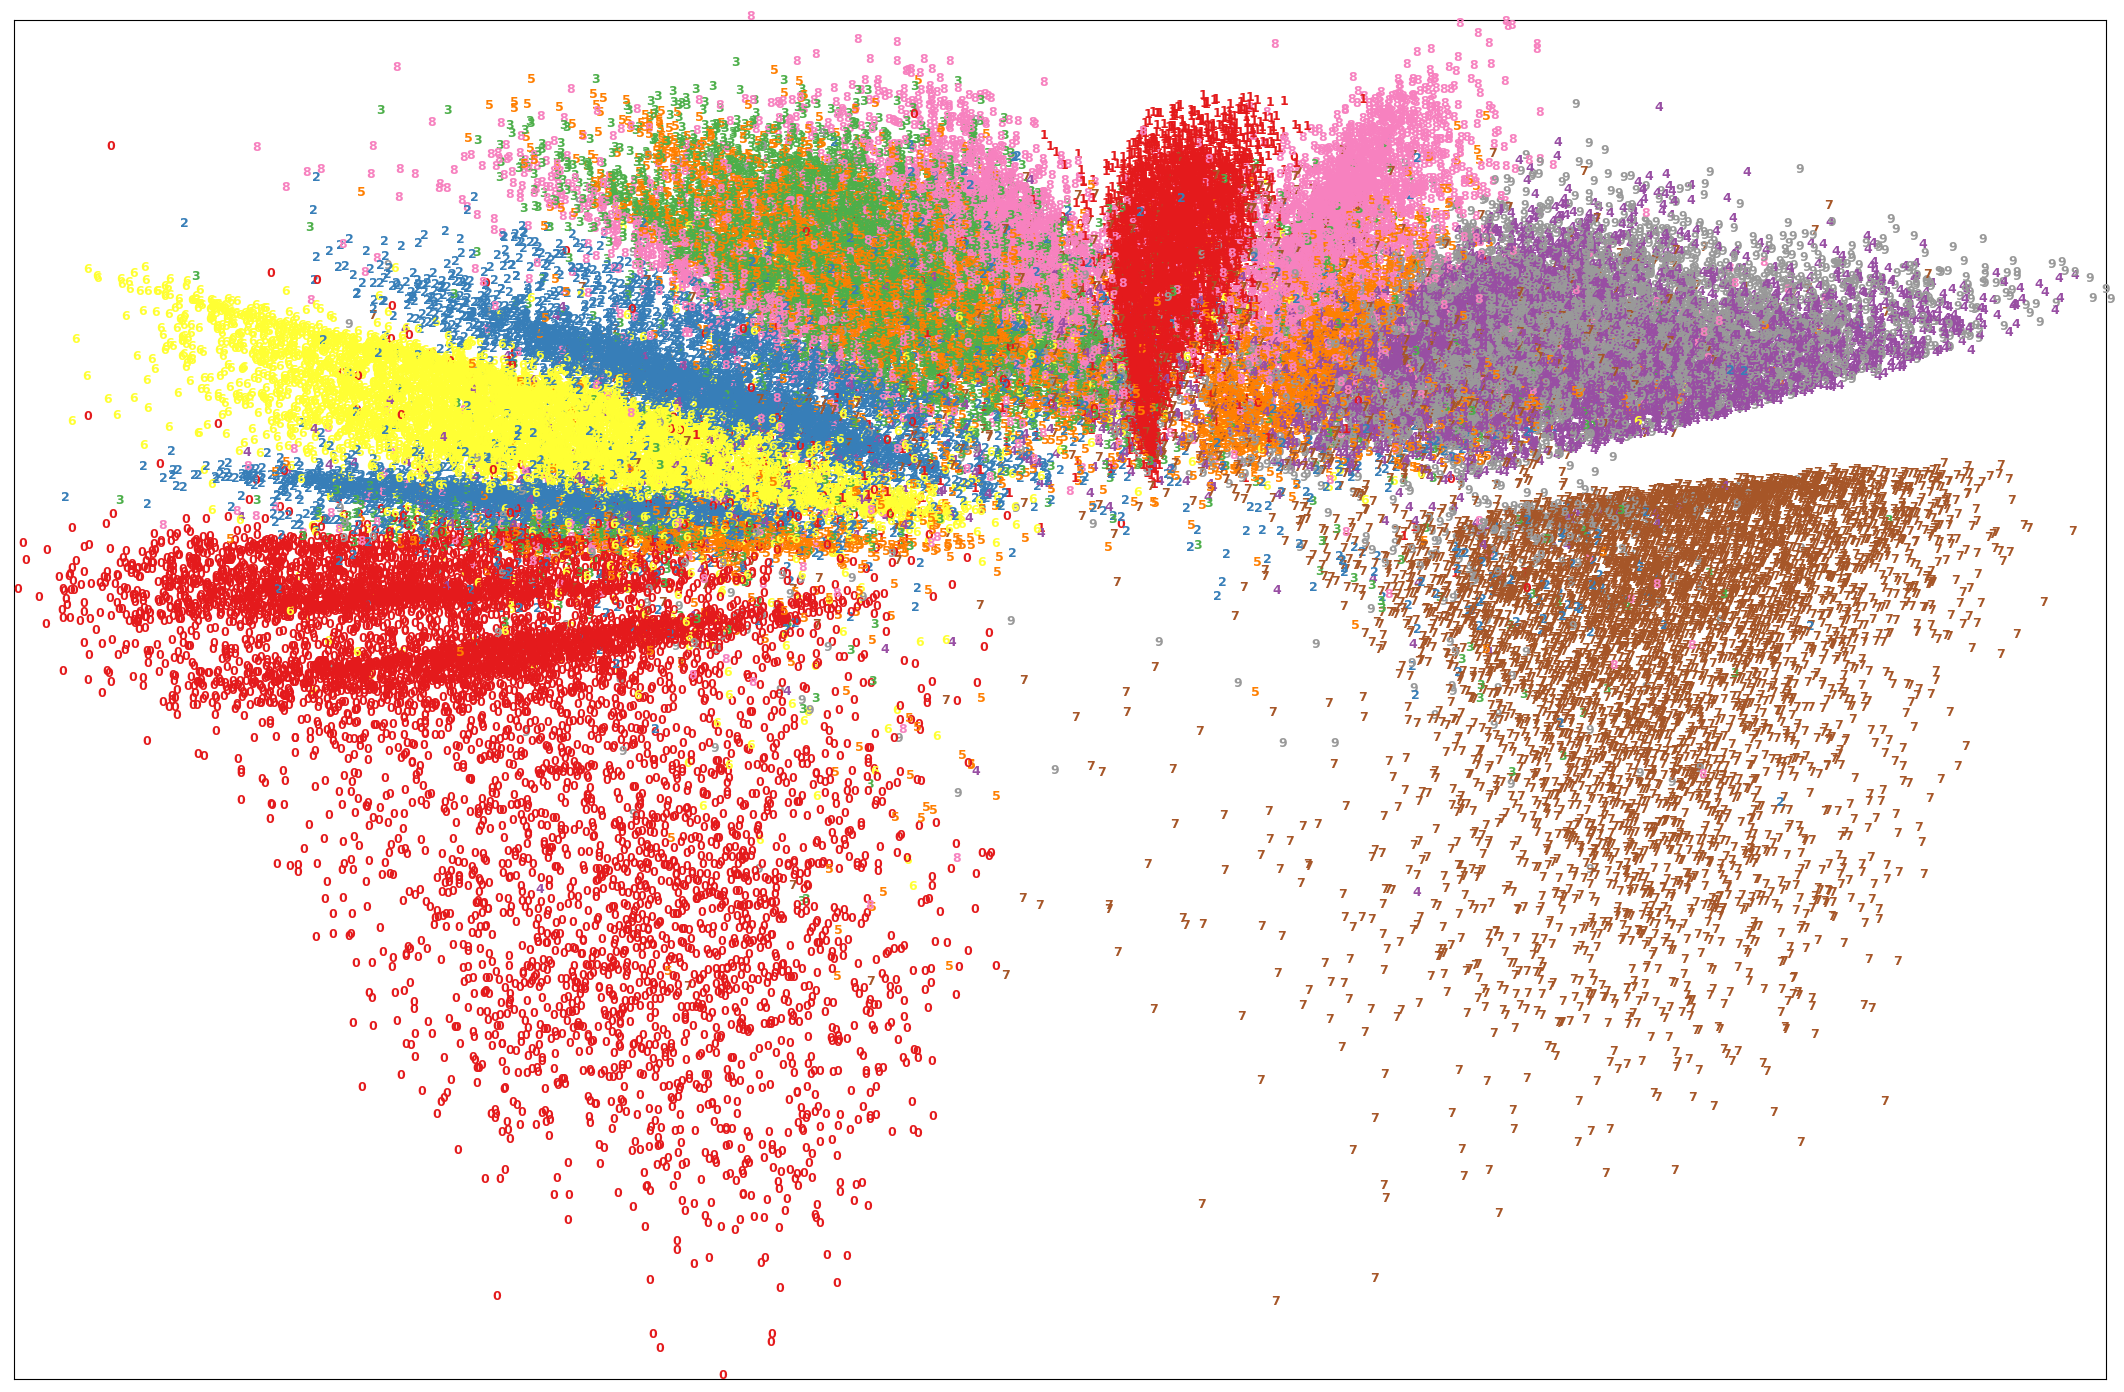

In [20]:
plot_dataset(z, y)